In [1]:
import pandas as pd

# Path to your Excel file
file_path = "celebDF_DS_corr_combined.xlsx"

# Select columns by their names (list)
df = pd.read_excel(file_path, usecols=["fl", "fr", "rl", "real","facecount","error"])
filtered_df = df[(df['facecount'] == 1) & (df['error'] == 0)]

filtered_df_cols = filtered_df[['fl', 'fr', 'rl','real']]
print(filtered_df)
print(filtered_df_cols)

      real        fl        fr        rl  facecount  error
0        1 -0.042439 -0.076128  0.032870        1.0      0
1        1  0.003989  0.016873  0.189464        1.0      0
2        1  0.001951 -0.022430  0.238053        1.0      0
3        1  0.139257 -0.075425 -0.059161        1.0      0
4        1 -0.022830  0.030943  0.087365        1.0      0
...    ...       ...       ...       ...        ...    ...
1198     1 -0.033766 -0.045588  0.245791        1.0      0
1199     1  0.111370 -0.008250  0.029951        1.0      0
1200     1 -0.016104  0.049779  0.134011        1.0      0
1201     1  0.054624 -0.046698  0.247080        1.0      0
1202     1  0.023780  0.092607  0.245795        1.0      0

[1133 rows x 6 columns]
            fl        fr        rl  real
0    -0.042439 -0.076128  0.032870     1
1     0.003989  0.016873  0.189464     1
2     0.001951 -0.022430  0.238053     1
3     0.139257 -0.075425 -0.059161     1
4    -0.022830  0.030943  0.087365     1
...        ...       

Accuracy: 0.5770925110132159
Precision: 0.2876712328767123
Recall: 0.3230769230769231
F1-score: 0.30434782608695654


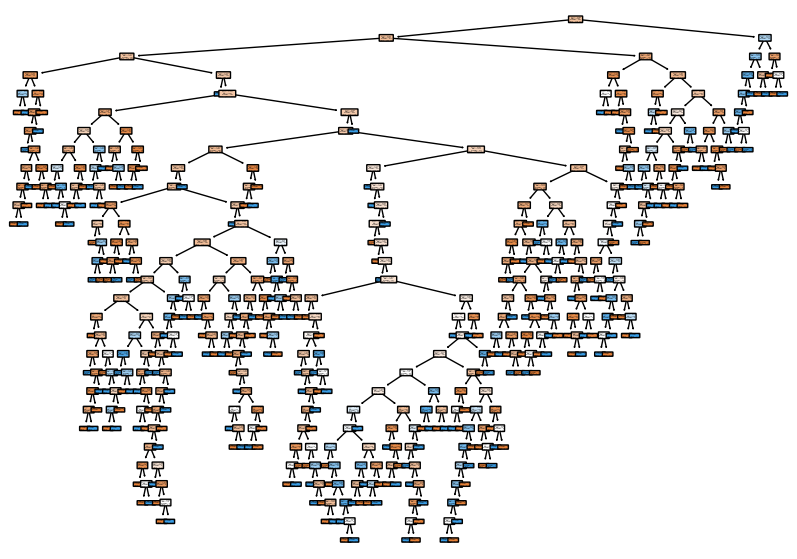

In [2]:
from sklearn.datasets import make_classification  # (optional for sample data)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming you have your data in a DataFrame named 'df'
# - 'fl', 'fr', 'rl' are feature columns
# - 'real' is the target variable (output attribute)

# 1. Load or create your data
X = filtered_df_cols[['fl', 'fr', 'rl']]  # Feature matrix
y = filtered_df_cols['real']  # Target variable

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train the decision tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# 4. Make predictions on the testing set
y_pred = clf.predict(X_test)

# 5. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# 6. Visualize the decision tree using Matplotlib
fig, ax = plt.subplots(figsize=(10, 7))  # Adjust figure size as needed
plot_tree(clf, ax=ax, filled=True, rounded=True)  # Optional arguments
plt.show()


Accuracy: 0.7048458149779736
Precision: 0.0
Recall: 0.0
F1-score: 0.0


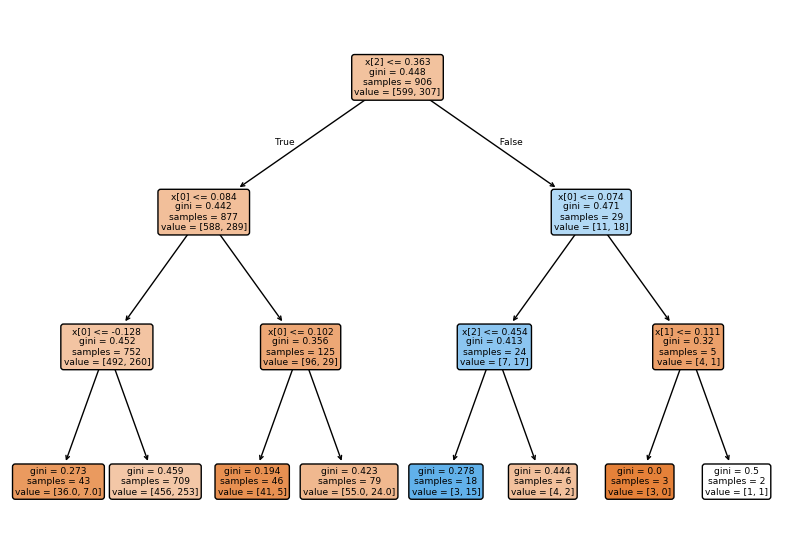

In [3]:
from sklearn.datasets import make_classification  # (optional for sample data)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV  # for hyperparameter tuning
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming you have your data in a DataFrame named 'df'
# - 'fl', 'fr', 'rl' are feature columns
# - 'real' is the target variable (output attribute)

# 1. Load or create your data
X = filtered_df_cols[['fl', 'fr', 'rl']]  # Feature matrix
y = filtered_df_cols['real']  # Target variable

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Improvement Strategy (Choose one or experiment with different ones):**

# **Example: Hyperparameter Tuning**
# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [3, 5, 8],
    'min_samples_split': [2, 5, 10]
}

# Create a DecisionTreeClassifier model
clf = DecisionTreeClassifier()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(clf, param_grid, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# **Other Strategies (replace hyperparameter tuning with your chosen approach):**
# - Feature engineering (create new features or select relevant ones)
# - Regularization techniques (control model complexity)
# - Ensemble methods (e.g., Random Forest)

# 3. Make predictions on the testing set using the improved model
y_pred = best_model.predict(X_test)

# 4. Evaluate the model with the improved decision tree
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# 5. Visualize the improved decision tree using Matplotlib
fig, ax = plt.subplots(figsize=(10, 7))  # Adjust figure size as needed
plot_tree(best_model, ax=ax, filled=True, rounded=True)  # Optional arguments
plt.show()

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd  # Assuming data is in a DataFrame

# Assuming you have your data in a DataFrame named 'df'
# - 'fl', 'fr', 'rl' are feature columns
# - 'real' is the target variable (output attribute)

# 1. Load or create your data
X = filtered_df_cols[['fl', 'fr', 'rl']]  # Feature matrix
y = filtered_df_cols['real']  # Target variable

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid to search for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a RandomForestClassifier model
rf_clf = RandomForestClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf_clf, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# 3. Make predictions on the testing set using the improved model
y_pred = best_model.predict(X_test)

# 4. Evaluate the model with the improved Random Forest
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


C:\Users\dpava\OneDrive\Documents\GitHub\HeartRate_Prediction\projectv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dpava\OneDrive\Documents\GitHub\HeartRate_Prediction\projectv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dpava\OneDrive\Documents\GitHub\HeartRate_Prediction\projectv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\dpava\OneDrive\Documents\Gi

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.6916299559471366
Precision: 0.14285714285714285
Recall: 0.015384615384615385
F1-score: 0.027777777777777776
